In [1]:
# Efficient_frontier by Pham (^-^)
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

years = 13
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

In [2]:
tickers = ['GLD','VOO']

df = yf.download(tickers, start=startDate, end=endDate)
df

[*********************100%%**********************]  2 of 2 completed


Price        Adj Close                   Close                    High  \
Ticker             GLD         VOO         GLD         VOO         GLD   
Date                                                                     
2011-03-01  140.029999   93.961304  140.029999  119.699997  140.029999   
2011-03-02  139.919998   94.228188  139.919998  120.040001  140.550003   
2011-03-03  138.089996   95.845215  138.089996  122.099998  139.130005   
2011-03-04  139.350006   95.138771  139.350006  121.199997  139.750000   
2011-03-07  139.720001   94.306671  139.720001  120.139999  140.610001   
...                ...         ...         ...         ...         ...   
2024-02-16  186.339996  459.029999  186.339996  459.029999  186.669998   
2024-02-20  187.470001  456.510010  187.470001  456.510010  188.029999   
2024-02-21  187.479996  456.970001  187.479996  456.970001  188.039993   
2024-02-22  187.559998  466.570007  187.559998  466.570007  187.639999   
2024-02-23  188.619995  466.779999  188.619995  466.779999  189.179993   

Price                          Low                    Open              \
Ticker             VOO         GLD         VOO         GLD         VOO   
Date                                                                     
2011-03-01  122.300003  138.490005  119.699997  138.570007  122.279999   
2011-03-02  120.559998  139.479996  119.500000  140.240005  119.620003   
2011-03-03  122.239998  137.570007  121.080002  138.809998  121.080002   
2011-03-04  122.059998  138.610001  120.400002  138.630005  122.059998   
2011-03-07  121.739998  139.279999  119.599998  140.289993  121.599998   
...                ...         ...         ...         ...         ...   
2024-02-16  462.149994  184.839996  458.399994  185.080002  461.079987   
2024-02-20  458.059998  187.399994  454.429993  187.960007  457.440002   
2024-02-21  457.119995  187.100006  453.600006  187.880005  455.320007   
2024-02-22  467.329987  187.050003  462.320007  187.559998  463.220001   
2024-02-23  468.869995  187.460007  466.089996  187.559998  468.089996   

Price         Volume           
Ticker           GLD      VOO  
Date                           
2011-03-01  17438100   235350  
2011-03-02  15719800   176350  
2011-03-03  16485000   136450  
2011-03-04  17454600   168250  
2011-03-07  14068900   155200  
...              ...      ...  
2024-02-16   6516800  5526200  
2024-02-20   5531200  5306800  
2024-02-21   5790000  4223100  
2024-02-22   4550800  4328500  
2024-02-23   6826100  4048500  

[3268 rows x 12 columns]

In [3]:
df = np.log(1 + df['Adj Close'].pct_change())
df

Ticker,GLD,VOO
Date,,
2011-03-01,NaN,NaN
2011-03-02,-0.000786,0.002836
2011-03-03,-0.013165,0.017015
2011-03-04,0.009083,-0.007398
2011-03-07,0.002652,-0.008785
...,...,...
2024-02-16,0.003656,-0.005128
2024-02-20,0.006046,-0.005505
2024-02-21,0.000053,0.001007


In [4]:
#portfolio return = w1*mean1 + w2*mean2
weights = [0.5,0.5]

weights[0]*df.iloc[:,0].mean() + weights[1]*df.iloc[:,1].mean()

0.0002909171600386143

In [5]:
# func for portfolio return with many assets
def portfolio_return(weights) :
    return np.dot(df.mean() , weights)

In [6]:
portfolio_return(weights)

0.0002909171600386143

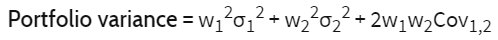

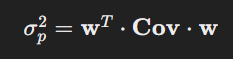

In [7]:
df.cov()

Ticker,GLD,VOO
Ticker,,
GLD,0.000095,0.000004
VOO,0.000004,0.000121


In [8]:
# portfolio variance 
pv = ((weights[0]**2)*df.cov().iloc[0,0]) + ((weights[1]**2)*df.cov().iloc[1,1]) + 2*weights[0]*weights[1]*df.cov().iloc[0,1]
pv

5.5897311034779614e-05

In [9]:
# portfolio std 
pv**(0.5)

0.00747645043016936

In [10]:
# portfolio_std for 1 years -> 252 trading days
pv**(0.5)*np.sqrt(252)

0.11868497116638005

In [11]:
# func for portfolio std with many assets
def portfolio_std(weights) :
    return (np.dot(np.dot(df.cov() , weights) , np.transpose(weights)) **(0.5) )*np.sqrt(252)

In [12]:
# portfolio_std for 1 years -> 252 trading days
portfolio_std(weights)

0.11868497116638005

In [13]:
# func for random portolio weights
def weights_random(df) :
    rand = np.random.random(len(df.columns))
    rand /= rand.sum()
    return rand

In [14]:
weights_random(df)

array([0.86691121, 0.13308879])

In [15]:
weights_random(df)

array([0.8238547, 0.1761453])

In [16]:
returns = []
stds = []
w = []
sharpeRatio =[]
#assume risk free rate = 0    sharp-ratio = (expected return - riskfreerate) / Standard deviation
for i in range(500) :
    weights = weights_random(df)
    returns.append(portfolio_return(weights))
    stds.append(portfolio_std(weights))
    w.append(weights)
    sharpeRatio.append(returns[i]/stds[i])
    

In [17]:
max(sharpeRatio)

0.0028489011819579097

In [18]:
np.argmax(sharpeRatio)

278

In [19]:
# Weights of assets that achieve the maximum Sharpe ratio
w[np.argmax(sharpeRatio)]

array([0.16847451, 0.83152549])

In [20]:
# minimum variance portfolio
min(stds)

0.11777349114405807

In [21]:
stds.index(min(stds))

71

In [22]:
returns[stds.index(min(stds))]

0.00026525381538408085

In [23]:
# Weights of assets that achieve the minimum variance portfolio
w[np.argmin(stds)]

array([0.56424207, 0.43575793])

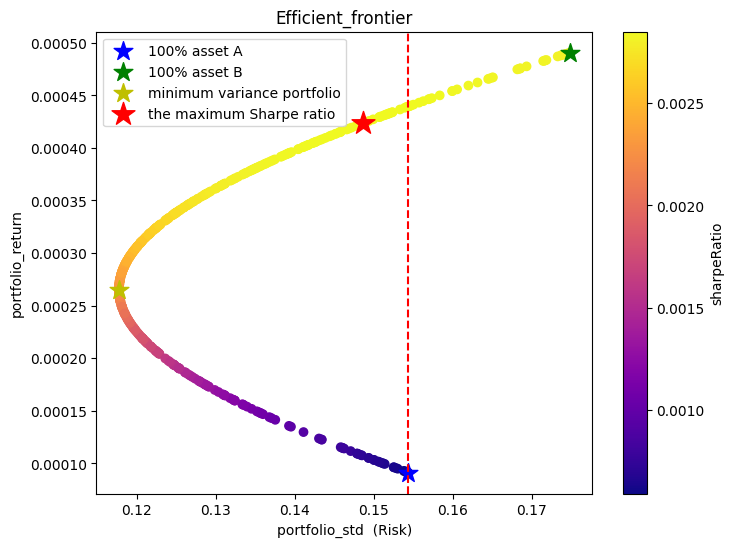

In [24]:
plt.figure(figsize = (8,6))
scatters = plt.scatter(stds,returns,c=sharpeRatio, cmap='plasma')

plt.scatter(df.std().iloc[0]*np.sqrt(252) , df.mean().iloc[0] , c = 'b', marker='*', s=200, label='100% asset A')
plt.scatter(df.std().iloc[1]*np.sqrt(252) , df.mean().iloc[1] , c = 'g', marker='*', s=200, label='100% asset B')
plt.axvline(x=df.std().iloc[0]*np.sqrt(252), linestyle='--', color='r')

plt.scatter(min(stds) , returns[stds.index(min(stds))] , c = 'y', marker='*', s=200, label='minimum variance portfolio' )
plt.scatter(stds[np.argmax(sharpeRatio)],returns[np.argmax(sharpeRatio)], c = 'r', marker='*', s=300, label='the maximum Sharpe ratio')


plt.xlabel('portfolio_std  (Risk)')
plt.ylabel('portfolio_return')
plt.title('Efficient_frontier')
plt.colorbar(scatters, label='sharpeRatio')
plt.legend()